### Description

This notebook is for plotting the Norm1 and Norm2 (definitions to be confirmed) differences between HYCOM output and EN4 analyses in the horizontal dimensions.

The two sets of plots are defined by the following two equations:

$\frac{\text{RMSE}_{FREE} - \text{RMSE}_{EnOI}}{\text{RMSE}_{FREE}} \times 100$

$\frac{\text{ERROR}_{FREE} - \text{ERROR}_{EnOI}}{\text{ERROR}_{FREE}} \times 100$

The EN4-transformed HYCOM data used in these scripts was generated on Fram by:
1. Linking weekly averages into a single directory; then
2. Using `hycave` to create a monthly mean from the weekly averages; then
3. Renaming the hycave output prefixes to be recognised by hyc2proj; then
4. Performing `hyc2proj` with depths matching the EN4 objective analysis; and
5. Finally performing `ncrcat` to create a single netcdf of all the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
# loading EN4 analysis data
ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-01','2009-09'))
ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15


# loading HYCOMcci data
ds_hycomcci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/CCI_SEN25_EN4H.nc')
ds_hycomcci['time'].values = ds_EN4['time'].values


# loading OSTIA data
ds_hycomostia = xr.open_dataset('../Data/HYCOM_EN4_horizontal/OSTIA_SEN30_EN4H.nc')
ds_hycomostia['time'].values = ds_EN4['time'].values


# loading AVHRR data
ds_hycomTSSTL2 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL2_SEN50_EN4H.nc')
ds_hycomTSSTL2['time'].values = ds_EN4['time'].values


# loading ATSR data
ds_hycomTSSTL3 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL3_SEN40_EN4H.nc')
ds_hycomTSSTL3['time'].values = ds_EN4['time'].values


# loading HYCOMFree data
ds_hycomfree = xr.open_dataset('../Data/HYCOM_EN4_horizontal/FREE_EN4H.nc')
ds_hycomfree['time'].values = ds_EN4['time'].values

# 1. RMSE norm

## Creating the Norms

In [9]:
# norm for CCI analysis
cci_norm_sst = (ds_hycomfree['temperature'].mean(dim='time') - ds_hycomcci['temperature'].mean(dim='time'))/ds_hycomfree['temperature'].mean(dim='time') * 100
cci_norm_sal = (ds_hycomfree['salinity'].mean(dim='time') - ds_hycomcci['salinity'].mean(dim='time'))/ds_hycomfree['salinity'].mean(dim='time') * 100

# norm for OSTIA analysis
ostia_norm_sst = (ds_hycomfree['temperature'].mean(dim='time') - ds_hycomostia['temperature'].mean(dim='time'))/ds_hycomfree['temperature'].mean(dim='time') * 100
ostia_norm_sal = (ds_hycomfree['salinity'].mean(dim='time') - ds_hycomostia['salinity'].mean(dim='time'))/ds_hycomfree['salinity'].mean(dim='time') * 100

# norm for TSSTL2
TSSTL2_norm_sst = (ds_hycomfree['temperature'].mean(dim='time') - ds_hycomTSSTL2['temperature'].mean(dim='time'))/ds_hycomfree['temperature'].mean(dim='time') * 100
TSSTL2_norm_sal = (ds_hycomfree['salinity'].mean(dim='time') - ds_hycomTSSTL2['salinity'].mean(dim='time'))/ds_hycomfree['salinity'].mean(dim='time') * 100

# norm for TSSTL3
TSSTL3_norm_sst = (ds_hycomfree['temperature'].mean(dim='time') - ds_hycomTSSTL3['temperature'].mean(dim='time'))/ds_hycomfree['temperature'].mean(dim='time') * 100
TSSTL3_norm_sal = (ds_hycomfree['salinity'].mean(dim='time') - ds_hycomTSSTL3['salinity'].mean(dim='time'))/ds_hycomfree['salinity'].mean(dim='time') * 100

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## 1.1 CCI Temperature

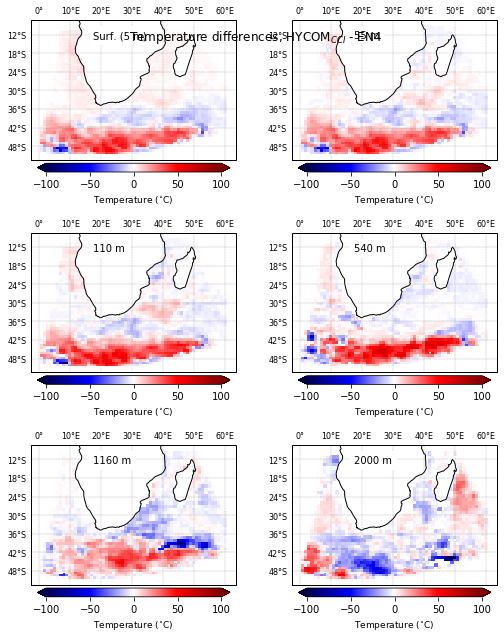

In [12]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature differences, HYCOM$_{CCI}$ - EN4', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = cci_norm_sst[depths[s]]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
# plt.savefig('../Figures/model_interior/Short_Temp_5_55_110_540_1160_2000_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.2 CCI Salinity

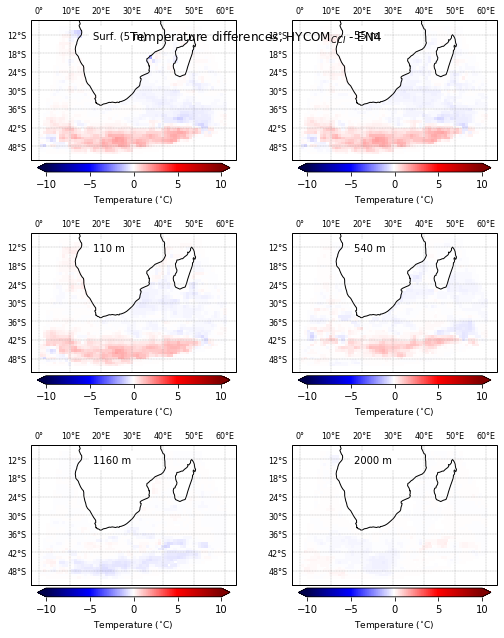

In [14]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature differences, HYCOM$_{CCI}$ - EN4', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = cci_norm_sal[depths[s]]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-10, vmax=10)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
# plt.savefig('../Figures/model_interior/Short_Temp_5_55_110_540_1160_2000_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.3 OSTIA Temperature

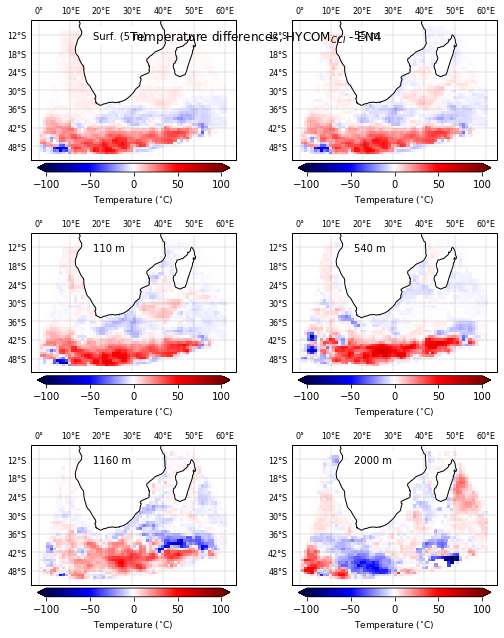

In [15]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature differences, HYCOM$_{CCI}$ - EN4', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = ostia_norm_sst[depths[s]]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
# plt.savefig('../Figures/model_interior/Short_Temp_5_55_110_540_1160_2000_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.4 OSTIA Salinity

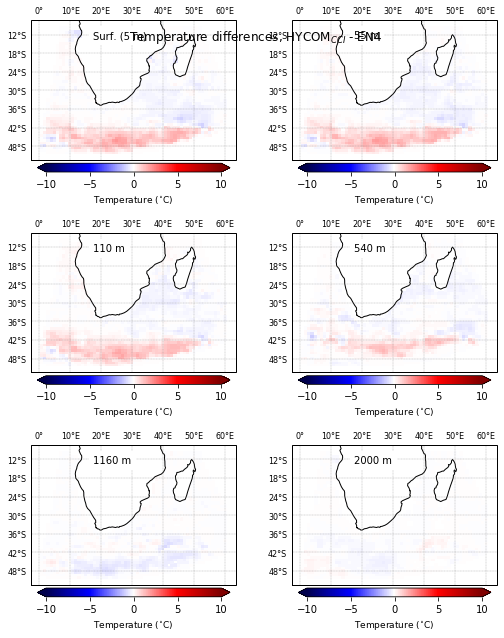

In [17]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature differences, HYCOM$_{CCI}$ - EN4', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    diff = ostia_norm_sal[depths[s]]
    
    img = diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-10, vmax=10)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
# plt.savefig('../Figures/model_interior/Short_Temp_5_55_110_540_1160_2000_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

In [7]:
cci_norm_sst

<xarray.DataArray 'temperature' (depth: 42, latitude: 41, longitude: 60)>
array([[[      nan,       nan, ...,       nan,       nan],
        [-3.907313, -9.691432, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [-3.931378, -9.709798, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan

# 2. Error norm